# Haberman's Survival

## Setting up the Environment

In [6]:
# Import all useful libraries for EDA , Data Visualization.


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [7]:
#Loading the dataset(csv file) and read it.

df=pd.read_csv(r'C:\Users\pc\Downloads\haberman.csv')

In [8]:
# Checking for the information of whole dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
30     305 non-null int64
64     305 non-null int64
1      305 non-null int64
1.1    305 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
# Checking for top 5 rows(by default) of the dataset

df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [10]:
#Checking for last 10 rows of the dataset

df.tail(10)

,30,64,1,1.1
295,72,67,3,1
296,73,62,0,1
297,73,68,0,1
298,74,65,3,2
299,74,63,0,1
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [11]:
#Converting column names from INT to Ctegorical by using Rename function.

df = df.rename(columns = {"30" : "age", "64" : "operation_year", "1" : "no_of_lymph_node", "1.1" : "survival_status"})



In [12]:
#Checking new dataset.

df.head(10)

,age,operation_year,no_of_lymph_node,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [13]:
#Checking for unique values of our Target variable whether patient survived or not.

df['survival_status'].unique()

array([1, 2], dtype=int64)

In [14]:
# Converting survival_status from Int(1 or 2) to Categorical values(yes or no).


df['survival_status'] =df['survival_status'].map({1:"yes", 2:"no"})

df['survival_status'] =df['survival_status'].astype('category')



In [15]:
# Checking for new dataset

df.head(10)

,age,operation_year,no_of_lymph_node,survival_status
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
4,33,58,10,yes
5,33,60,0,yes
6,34,59,0,no
7,34,66,9,no
8,34,58,30,yes
9,34,60,1,yes


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age                 305 non-null int64
operation_year      305 non-null int64
no_of_lymph_node    305 non-null int64
survival_status     305 non-null category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


# Descriptive Statistics

In [17]:
#total rows=305
#total columns=4

df.shape

(305, 4)

In [18]:
##Statistics for complete dataset

df.describe()

,age,operation_year,no_of_lymph_node
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


# Statistics for Independent variables individually

In [19]:
#Statistics for Individual Non-categorical variable.
#Checking mean for Independent variable 'no_of_lymph_node'.

df['no_of_lymph_node'].mean()

4.036065573770492

In [20]:
#Checking min for 'no_of_lymph_node'

df['no_of_lymph_node'].min()

0

In [21]:
#Checking max for 'no_of_lymph_node'
df['no_of_lymph_node'].max()

52

In [22]:
#Checking standard deviation for 'no_of_lymph_node'
df['no_of_lymph_node'].std()

7.19937023897167

In [23]:
#or  Checking for all statistics for 'no_of_lymph_node'
df['no_of_lymph_node'].describe()

count    305.000000
mean       4.036066
std        7.199370
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: no_of_lymph_node, dtype: float64

In [24]:
#Observing statistics and identifying outliers in 'no_of_lymph_node'
#Checking 25% quantile for 'no_of_lymph_node'
q1=df['no_of_lymph_node'].quantile(.25)

In [25]:
#Checking 50% quantile for 'no_of_lymph_node'
q2=df['no_of_lymph_node'].quantile(.50)

In [26]:
#Checking 75% quantile for 'no_of_lymph_node'
q3=df['no_of_lymph_node'].quantile(.75)

In [27]:
#Inter Quantile Range(IQR) for 'age'.

IQR= q3-q1

In [28]:
IQR

4.0

In [29]:
#Upper & lower limits for 'age'.

upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR



In [30]:
upper_limit

10.0

In [31]:
lower_limit

-6.0

In [32]:
#Checking for an Outlier in 'no_of_lymph_node'.

#defining a limit imputer function to check its lower and upper bound error due to outlier.

def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [33]:
df['no_of_lymph_node']=df['no_of_lymph_node'].apply(limit_imputer)

In [34]:
#Now checking for  statistics again

df['no_of_lymph_node'].describe()

count    305.000000
mean       2.796721
std        3.673069
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: no_of_lymph_node, dtype: float64

# Univariate Analysis

# #Pdf

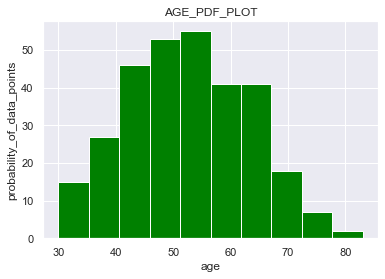

In [35]:
#PDF is when a variable takes the value x.
#PDF plot is another form of Histogram(plot for continuous variables only).
#In pdf plot y-axis shows what % of data distributed over the entire Independent variable(x-axis) range. 

#Plot for Age column using matplotlib.

plt.hist(df['age'], color='green')
plt.xlabel('age')
plt.ylabel('probability_of_data_points')
plt.title('AGE_PDF_PLOT')
plt.show()

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


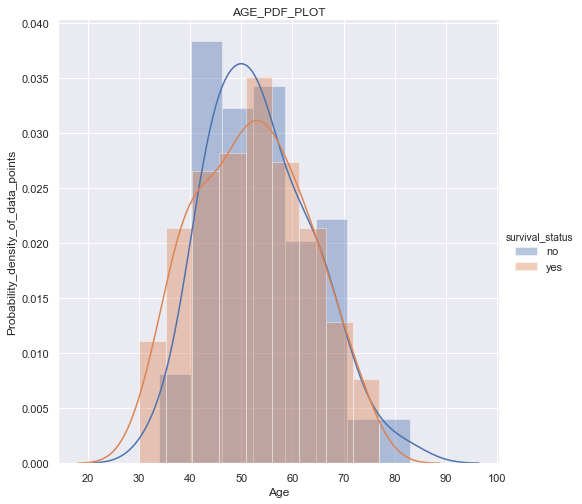

In [36]:
# Plot for age w.r.to Target variable(survival_status) using seaborn.

sns.FacetGrid(df, hue = 'survival_status', size = 7).map(sns.distplot, 'age').add_legend()
plt.title('AGE_PDF_PLOT')
plt.xlabel('Age')
plt.ylabel('Probability_density_of_data_points')
plt.show()

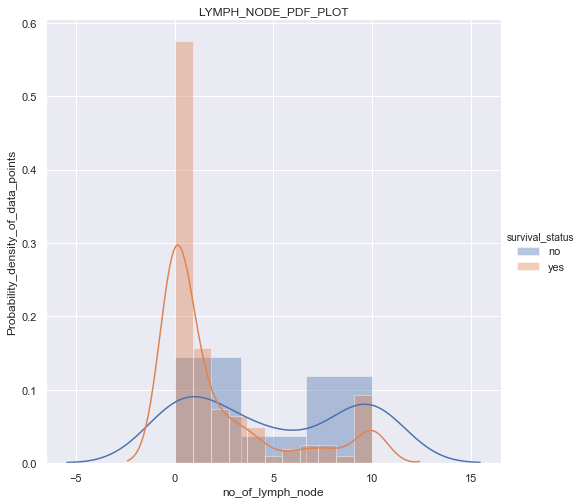

In [37]:
#Similarly plotting pdf curve for 'no_of_lymph_node'

sns.FacetGrid(df, hue = 'survival_status', size = 7).map(sns.distplot, 'no_of_lymph_node').add_legend()
plt.title('LYMPH_NODE_PDF_PLOT')
plt.xlabel('no_of_lymph_node')
plt.ylabel('Probability_density_of_data_points')
plt.show()

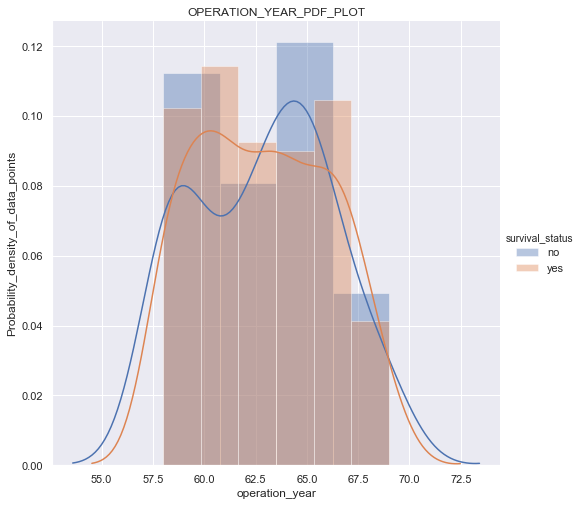

In [38]:
#Similarly plotting pdf curve for 'operation_year'

sns.FacetGrid(df, hue = 'survival_status', size = 7).map(sns.distplot, 'operation_year').add_legend()
plt.title('OPERATION_YEAR_PDF_PLOT')
plt.xlabel('operation_year')
plt.ylabel('Probability_density_of_data_points')
plt.show()

# #Cdf

Bin Edges: [30.  40.6 51.2 61.8 72.4 83. ]
PDF: [0.13770492 0.32459016 0.3147541  0.19344262 0.0295082 ]
CDF: [0.13770492 0.46229508 0.77704918 0.9704918  1.        ]
Bin Edges: [58.  60.2 62.4 64.6 66.8 69. ]
PDF: [0.29836066 0.16065574 0.19672131 0.18360656 0.16065574]
CDF: [0.29836066 0.45901639 0.6557377  0.83934426 1.        ]
Bin Edges: [ 0.  2.  4.  6.  8. 10.]
PDF: [0.57704918 0.13114754 0.06229508 0.04590164 0.18360656]
CDF: [0.57704918 0.70819672 0.7704918  0.81639344 1.        ]


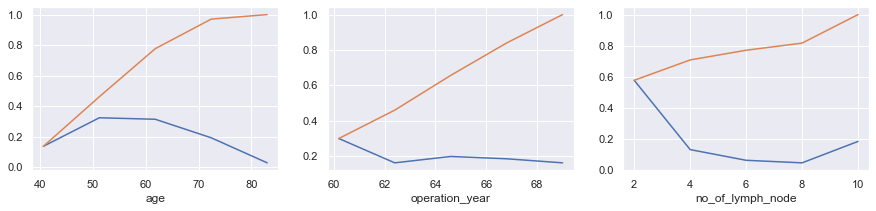

In [46]:
#CDF is when a variable takes the value 1.
#Area under its curve = CDF
#In cdf plot y-axis shows data distributed(patient) over the entire Independent variable(x-axis) range according to its two classes(1 or 2).
#Classes for survival_status: class 1 =survived for 5 years & class 2= not survived/died.
#Plotting CDF for all Independent variables w.r.t. target variable/dependent variable.

plt.figure(figsize=(15,3))
for idx, feature in enumerate(list(df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
 
    counts, bin_edges = np.histogram(df[feature], bins=5, density=True)
    print("Bin Edges: {}".format(bin_edges))
    
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

# #Box Plot

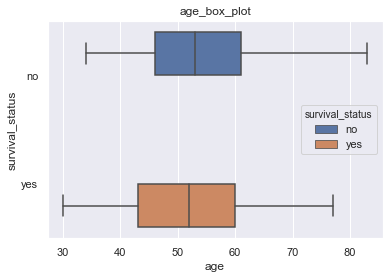

In [40]:
#Helps to identify/treat missing values or outliers.
#1st Quantile and 3rd quantile of the box plot tells us the range of variance with better understanding.
#When distance between each quantile is constant - data is called 'Uniformly distributed'.
#Q2 is the mean/average value of the given dataset.
#When values are more closer to mean STD will be low else STD will be high.


#Box plot for 'age' w.r.t 'survival_status'

sns.boxplot(y = "survival_status", x = "age", hue = "survival_status", data=df).set_title("age_box_plot")
plt.show()



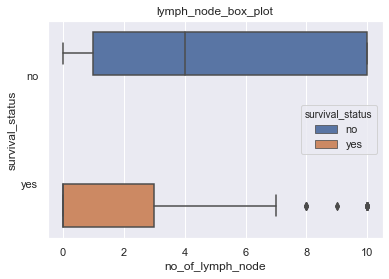

In [41]:
#Box plot for 'no_of_lymph_node' w.r.t 'survival_status'

sns.boxplot(y = 'survival_status', x = 'no_of_lymph_node', hue = "survival_status", data=df).set_title("lymph_node_box_plot")
plt.show()

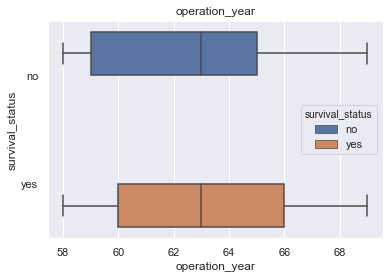

In [42]:
#Box plot for 'operation_year' w.r.t 'survival_status'

sns.boxplot(y = 'survival_status', x = 'operation_year', hue = "survival_status", data=df).set_title("operation_year")
plt.show()

# #Violin Plot

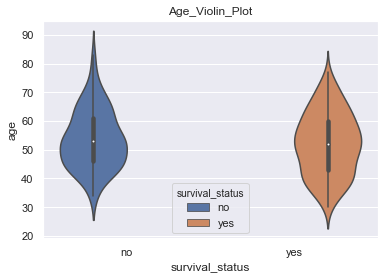

In [43]:
#Violin plot is a hybrid of boxplot and Kernel Density Plot(Distplot/Histplot).
#Its Wider sections of the violin plot represent a higher probability that members of the population will take on the given value.
#The skinnier sections represent a lower probability.
#Its center dot represents the median and center line reperesents the IQR(inter quantile range).

#Violin plot for 'age' w.r.t target variable(survival_status).

sns.violinplot(x = 'survival_status', y = 'age', hue = 'survival_status', data = df)
plt.title('Age_Violin_Plot')
plt.show()


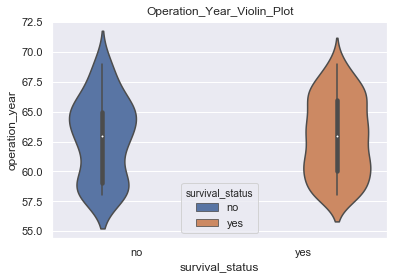

In [44]:
#Violin plot for 'operation_year' w.r.t target variable(survival_status).

sns.violinplot(x = 'survival_status', y = 'operation_year', hue = 'survival_status', data = df)
plt.title('Operation_Year_Violin_Plot')
plt.show()

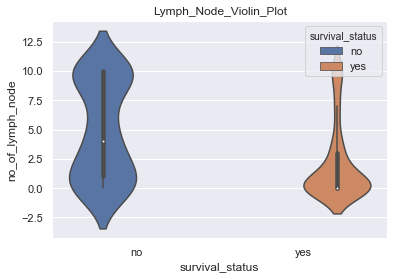

In [45]:
#Violin plot for 'no_of_lymph_node' w.r.t target variable(survival_status).

sns.violinplot(x = 'survival_status', y = 'no_of_lymph_node', hue = 'survival_status', data = df)
plt.title('Lymph_Node_Violin_Plot')
plt.show()

# Bivariate Analysis

# #Scatter Plot

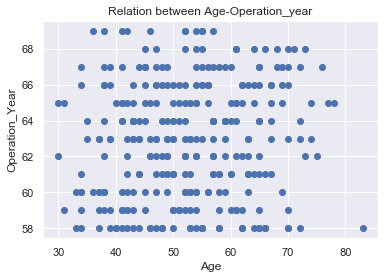

In [50]:
#To find relation between two variables we use Bivariate analysis.
#Scatter plot is used to find relation between 2 numeric variables(continuous).
#Scatter plot tells us about the linear relatioonship between those 2.

#Scatter plot of 'age' & 'operation year' [2-D].
#in matplotlib

plt.scatter(x=df['age'], y=df['operation_year'])
plt.xlabel('Age')
plt.ylabel('Operation_Year')
plt.title('Relation between Age-Operation_year')
plt.show()

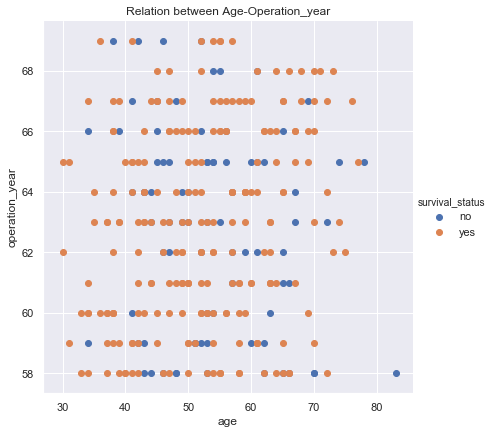

In [53]:
#Scatter plot of 'age' & 'operation year' [2-D].
#in Seaborn.

sns.set_style('darkgrid')
sns.FacetGrid(df, hue = 'survival_status', size = 6).map(plt.scatter, 'age', 'operation_year').add_legend()
plt.title('Relation between Age-Operation_year')
plt.show()

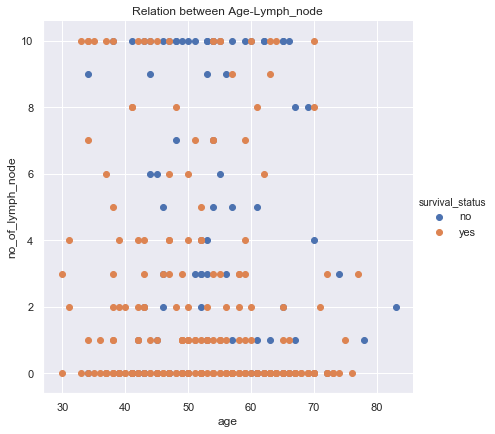

In [56]:
#Scatter plot of 'age' & 'no_of_lymph_node' [2-D].
#in Seaborn.

sns.set_style('darkgrid')
sns.FacetGrid(df, hue = 'survival_status', size = 6).map(plt.scatter, 'age', 'no_of_lymph_node').add_legend()
plt.title('Relation between Age-Lymph_node')
plt.show()

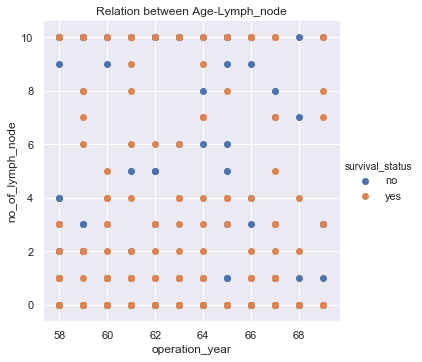

In [61]:
#Scatter plot of 'operation_year' & 'no_of_lymph_node' [2-D].
#in Seaborn.

sns.set_style('darkgrid')
sns.FacetGrid(df, hue = 'survival_status', size = 5).map(plt.scatter, 'operation_year', 'no_of_lymph_node').add_legend()
plt.title('Relation between Age-Lymph_node')
plt.show()

# #Pair Plot

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


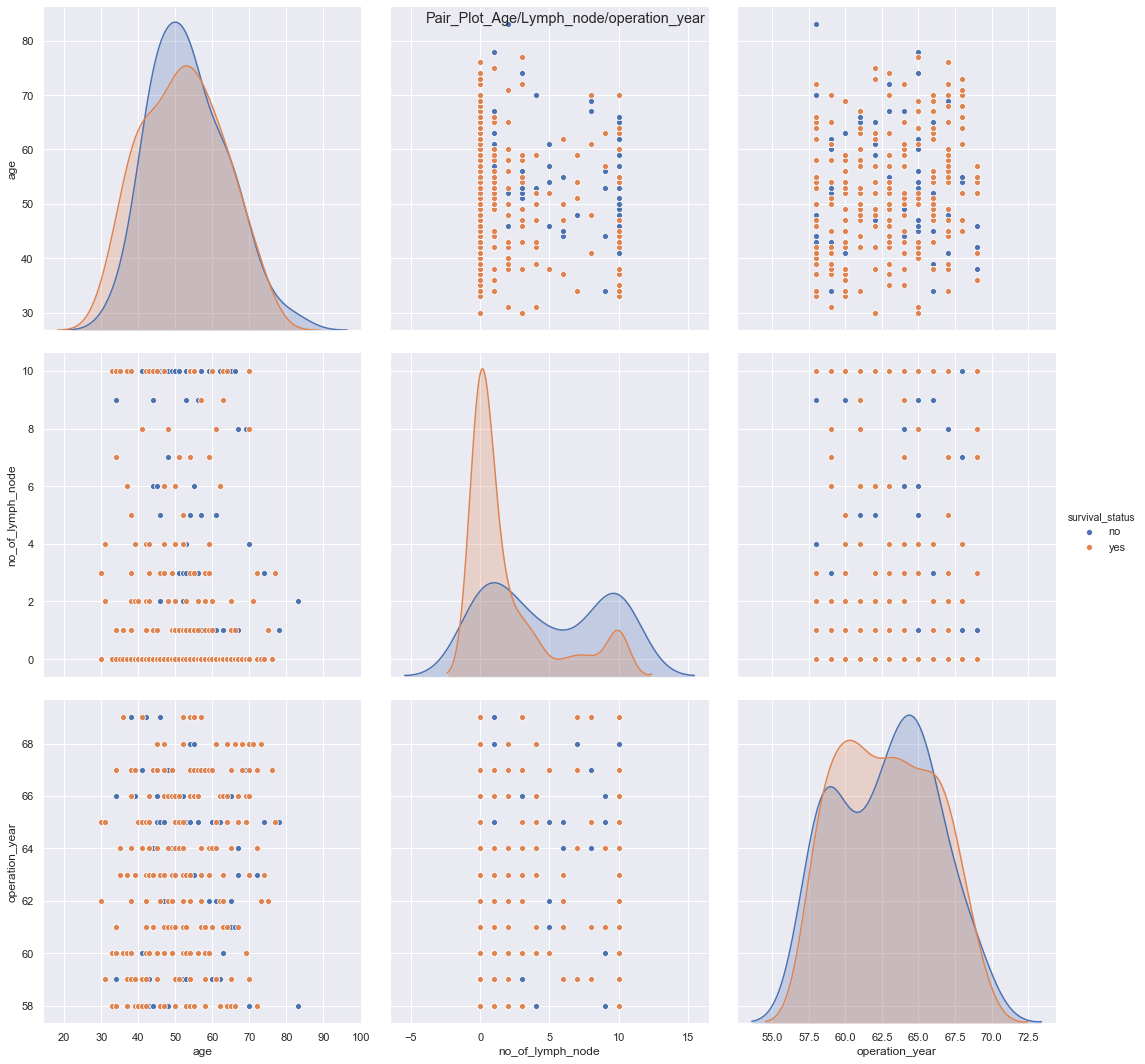

In [62]:
#Gives more understanding of relation between two numeric variables.
#By visualising pair plot we can find linear or non linear relationship between variables.
#Based on linearity we can select optimal algorithm for model prediction of given dataset.
#Fit line tells us whether relation is linear or not.
#Use Regression for linear and 'K-means' for non linear.
#Easily find the in-between relationship of less no. of variables like here, columns=4 using common code command.


sns.set_style('darkgrid')
sns.pairplot(df, hue = 'survival_status', vars = ['age','no_of_lymph_node','operation_year'], size = 5)
plt.suptitle('Pair_Plot_Age/Lymph_node/operation_year')
plt.show()
 
    